# Examples: tuneR + seewave
- https://cran.r-project.org/web/packages/tuneR/tuneR.pdf
- http://rug.mnhn.fr/seewave/
- http://rug.mnhn.fr/seewave/docu.html
- http://rug.mnhn.fr/seewave/exam.html

# TODO
- tuneR
    - melfcc
    - lifter
    - audspec
- seewave
    - Covariance between two spectros: http://rug.mnhn.fr/seewave/HTML/MAN/covspectro.html
    - Fundamental freq: http://rug.mnhn.fr/seewave/ex10.html
    - Wide spectro: http://rug.mnhn.fr/seewave/ex34.html
    - Long spectro: http://rug.mnhn.fr/seewave/ex35.html
    - ggspectro: http://rug.mnhn.fr/seewave/ex37.html, http://rug.mnhn.fr/seewave/ex38.html
    - Filter the ifreq: http://rug.mnhn.fr/seewave/ex39.html, http://rug.mnhn.fr/seewave/ex40.html

In [ ]:
%%py
figsize('inline_short')
%default_magic R

default_magic: %R


In [ ]:
suppressMessages(library(tidyverse))
suppressMessages(library(reshape))
suppressMessages(library(viridis))
suppressMessages(library(tuneR))
suppressMessages(library(seewave))

data(peewit)
data(tico)

# audio <- peewit
# audio <- tico
f <- 22050

magma_r = function(...) { magma(..., direction=-1) }
gray.colors <- colorRampPalette(c("white", "black"))

In [ ]:
audio <- readMP3('/Users/danb/hack/bubo/data/peterson-field-guide/wlswar/audio/43231921 Song (2 series).mp3')
audio <- mono(audio, 'both')
audio <- downsample(audio, 22050)
audio


Wave Object
	Number of Samples:      568512
	Duration (seconds):     25.78
	Samplingrate (Hertz):   22050
	Channels (Mono/Stereo): Mono
	PCM (integer format):   TRUE
	Bit (8/16/24/32/64):    16 



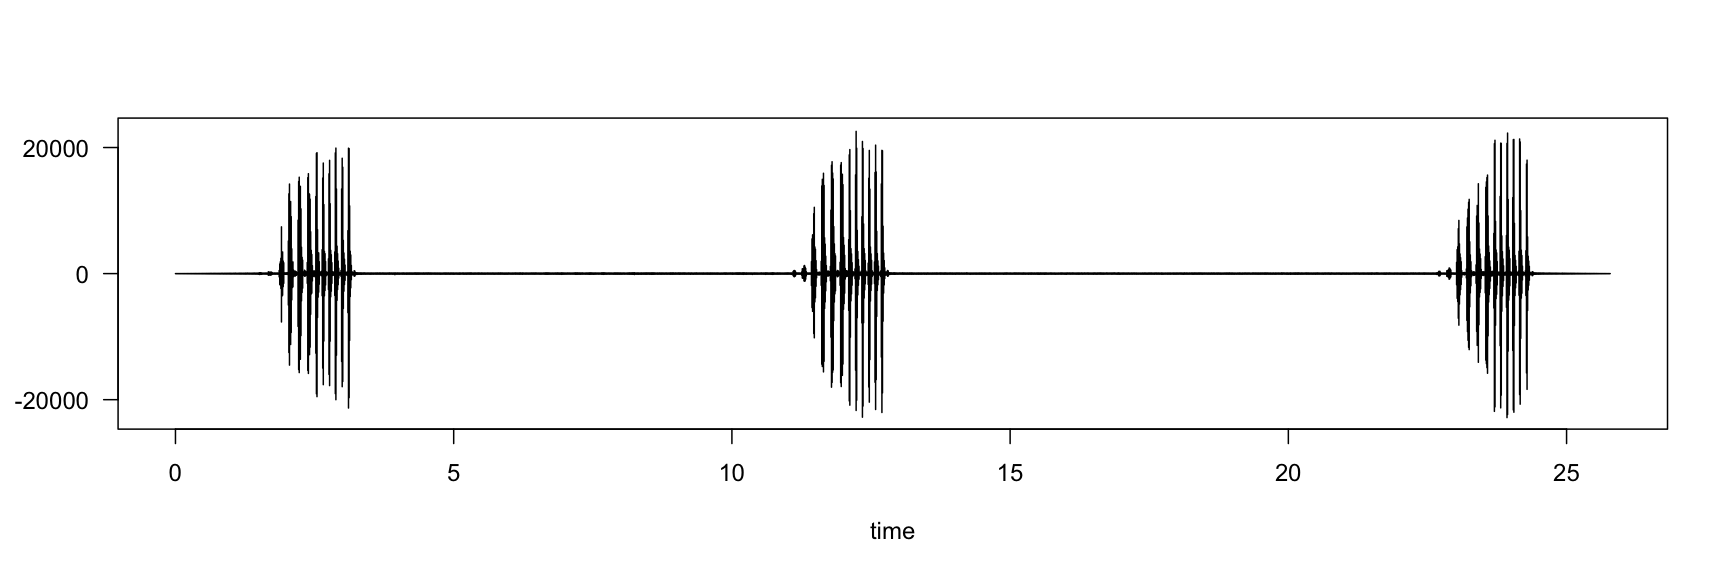

In [ ]:
plot(audio)

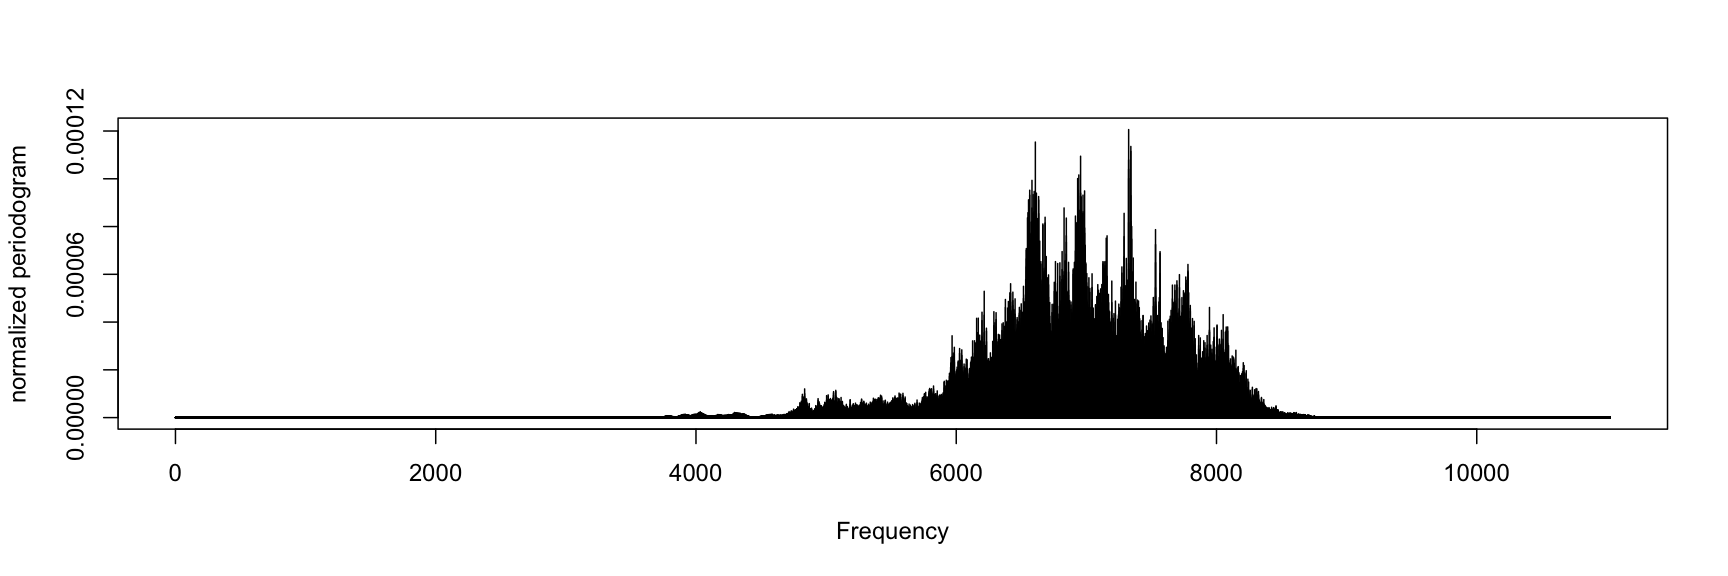

In [ ]:
plot(periodogram(audio))

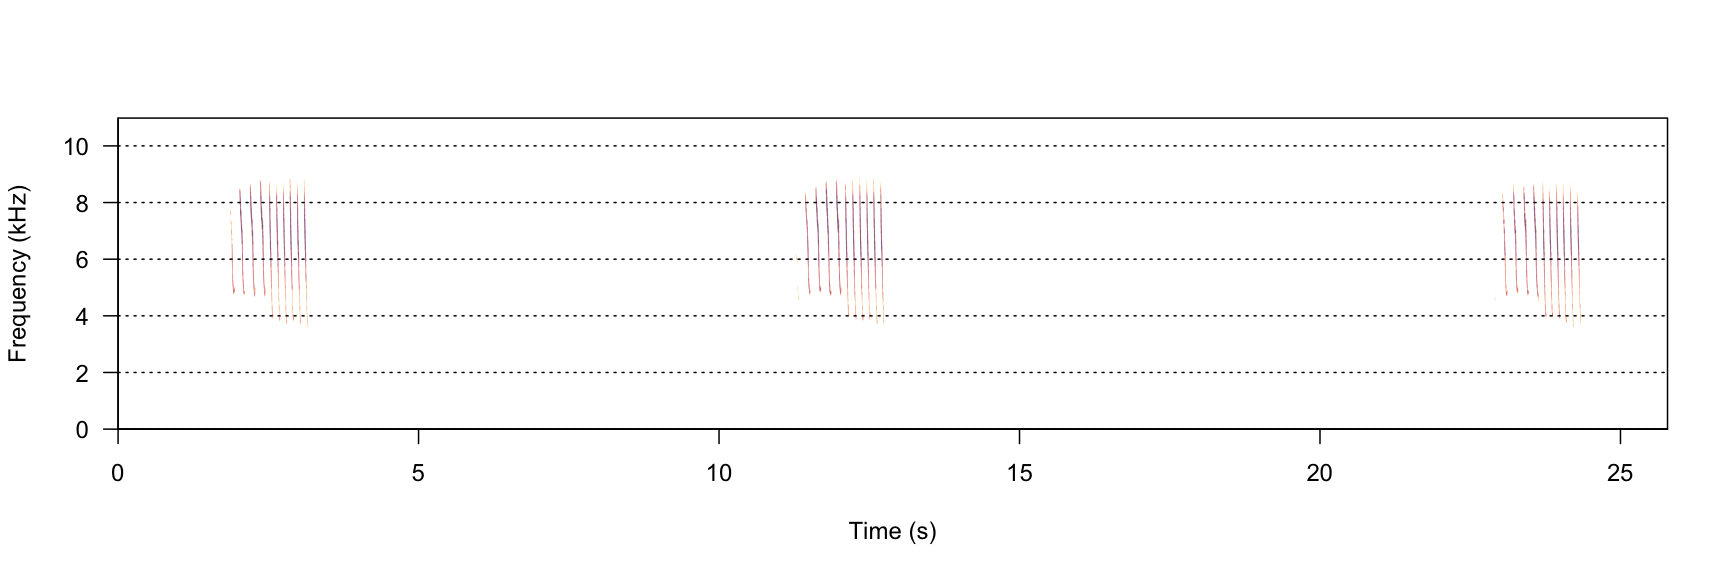

In [ ]:
# TODO Log/mel scale
spectro(audio, ovlp=75, palette=magma_r, scale=FALSE)

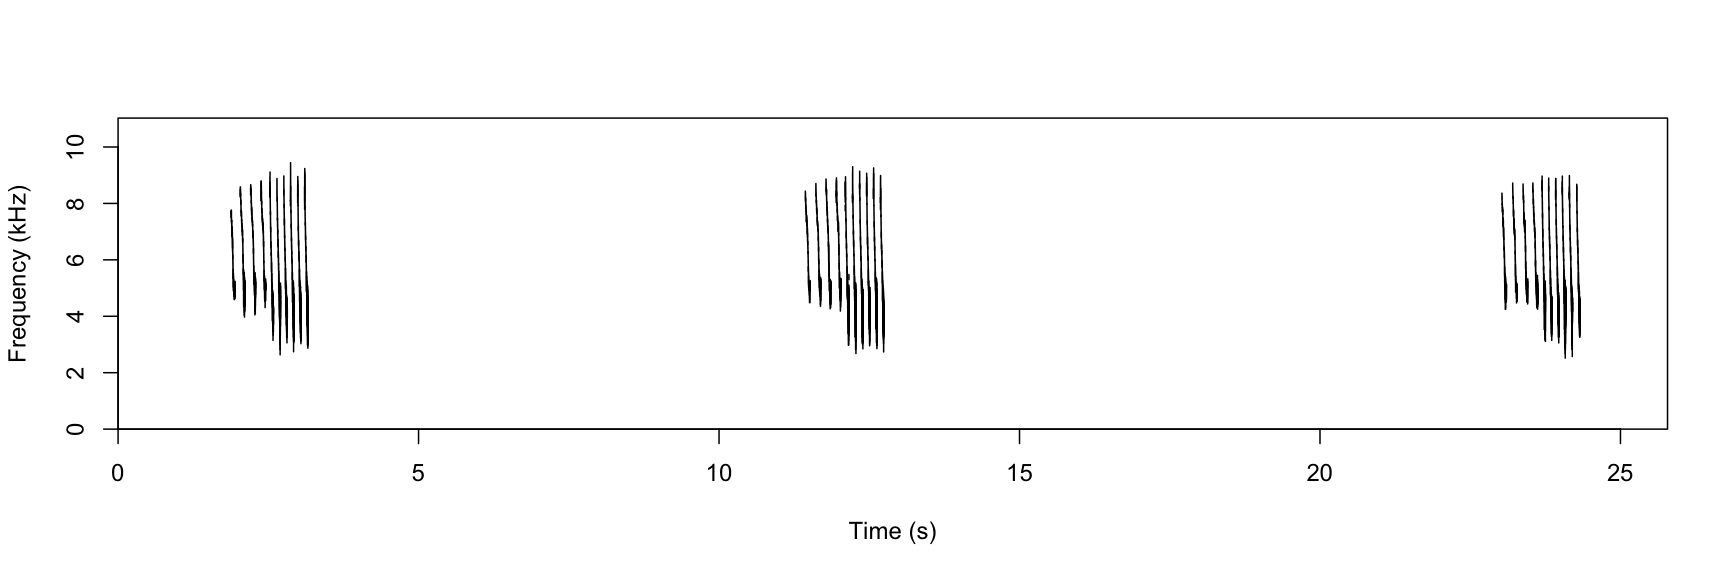

In [ ]:
# Instantaneous freq (http://rug.mnhn.fr/seewave/ex13.html)
ifreq(audio, f=f, threshold=6)

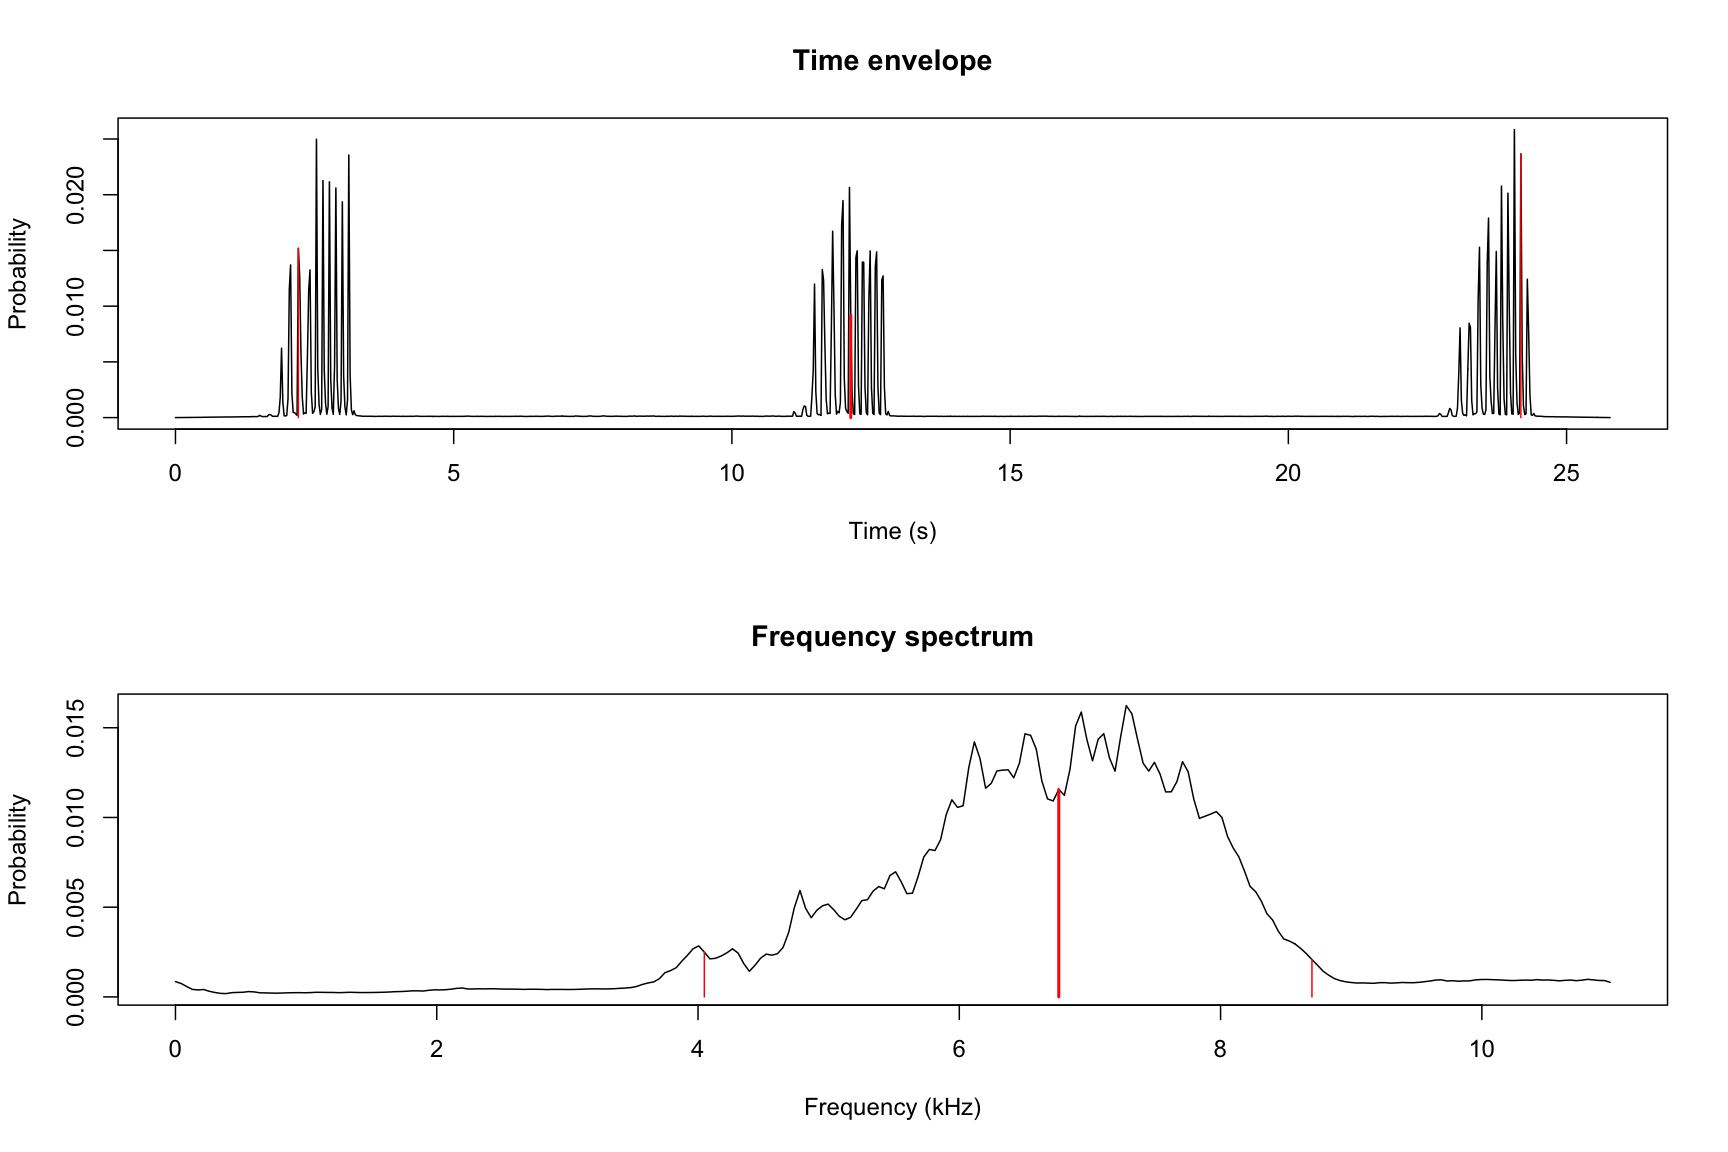

In [ ]:
%%R -h8
acoustat(audio)

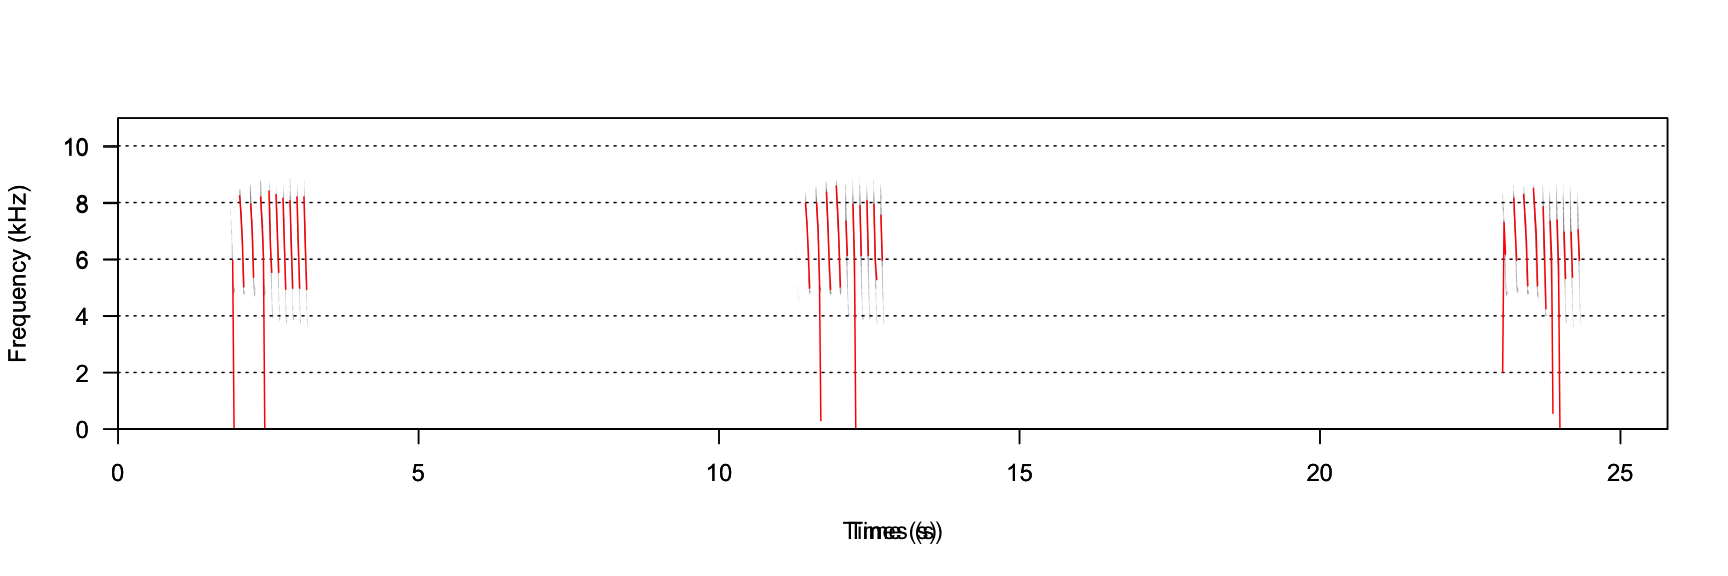

In [ ]:
# Dominant freqs (http://rug.mnhn.fr/seewave/ex07.html)
#   - cf. http://rug.mnhn.fr/seewave/ex30.html
#   - cf. http://rug.mnhn.fr/seewave/ex31.html
spectro(audio, ovlp=75, palette=gray.colors, scale=FALSE)
par(new=TRUE)
dfreq(audio, f=f, threshold=15, type='l', col='red', lwd=1)

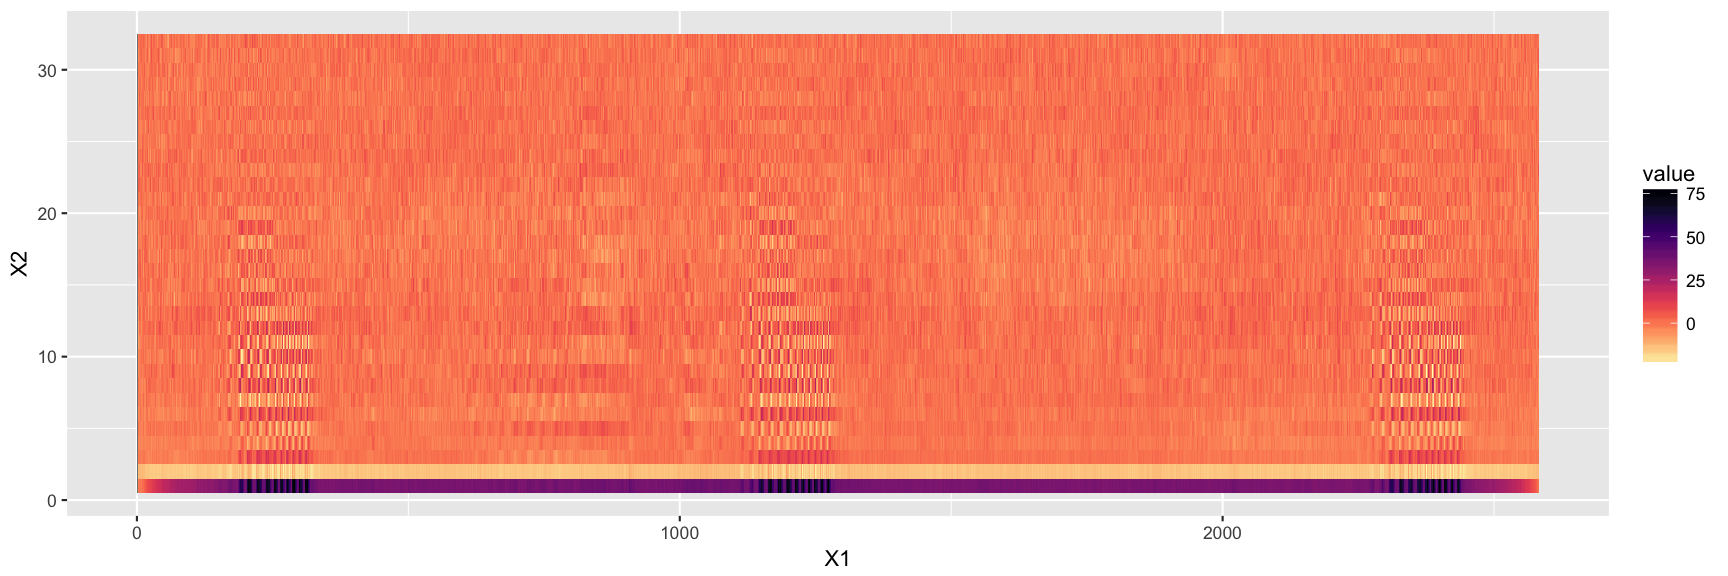

In [ ]:
# https://www.rdocumentation.org/packages/tuneR/versions/1.3.2/topics/melfcc
melfcc(
    audio,
    fbtype='mel',  # Default: 'mel'
    dcttype='t2',  # Default: 't2'
    nbands=32,  # Default: 40
    # bwidth=1,  # Default: 1
    numcep=32,  # This zeros out at nbands+1 and starts repeating afterwards
    wintime=.025,  # Default: 0.025
    hoptime=.01,  # Default: 0.01
    # preemph=.97,  # Default: 0.97
) %>%
    reshape::melt() %>%
    ggplot(aes(X1, X2, fill=value)) +
    geom_tile() +
    scale_fill_viridis(option="magma", direction=-1)

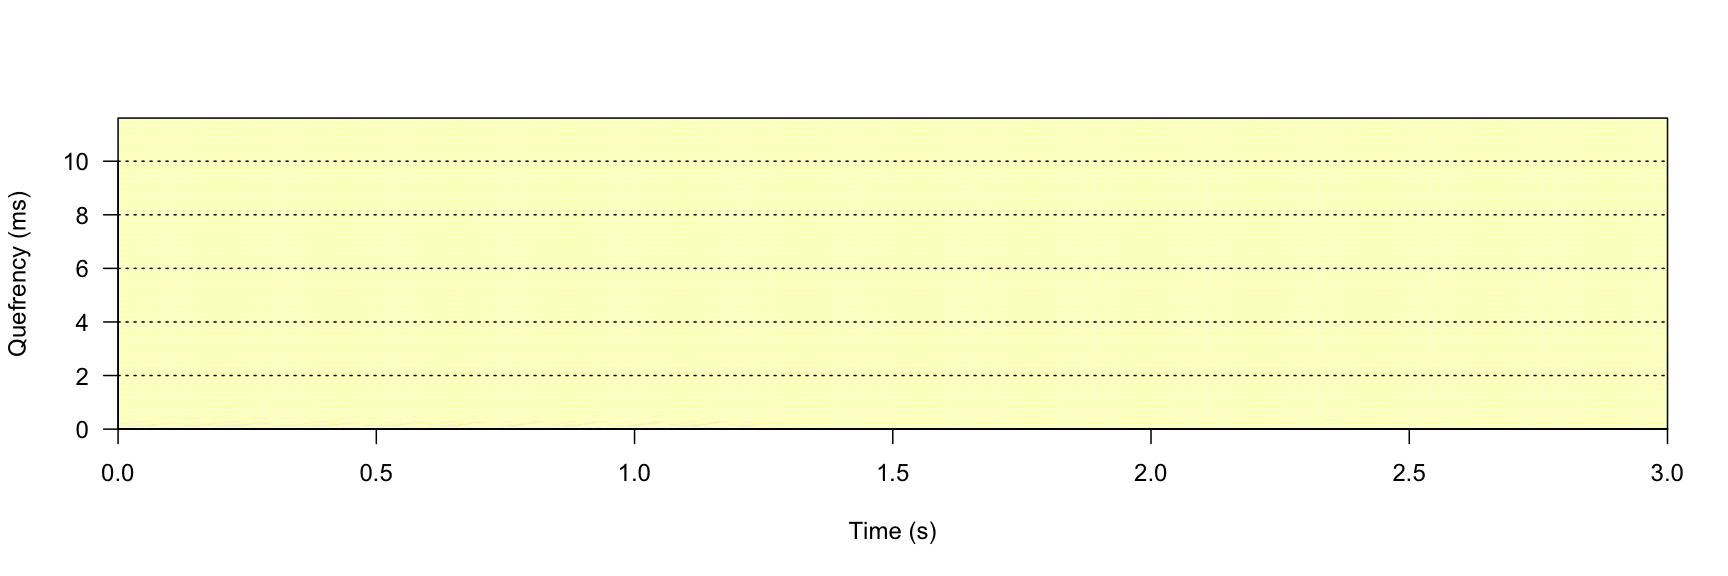

In [ ]:
# TODO Any way to log/mel scale (without rewriting it ourselves)?
audio %>%
    extractWave(., from=2, to=5, xunit='time') %>%
    cepstro(
        ovlp=75,
        palette=magma_r,
        scale=FALSE,
    )

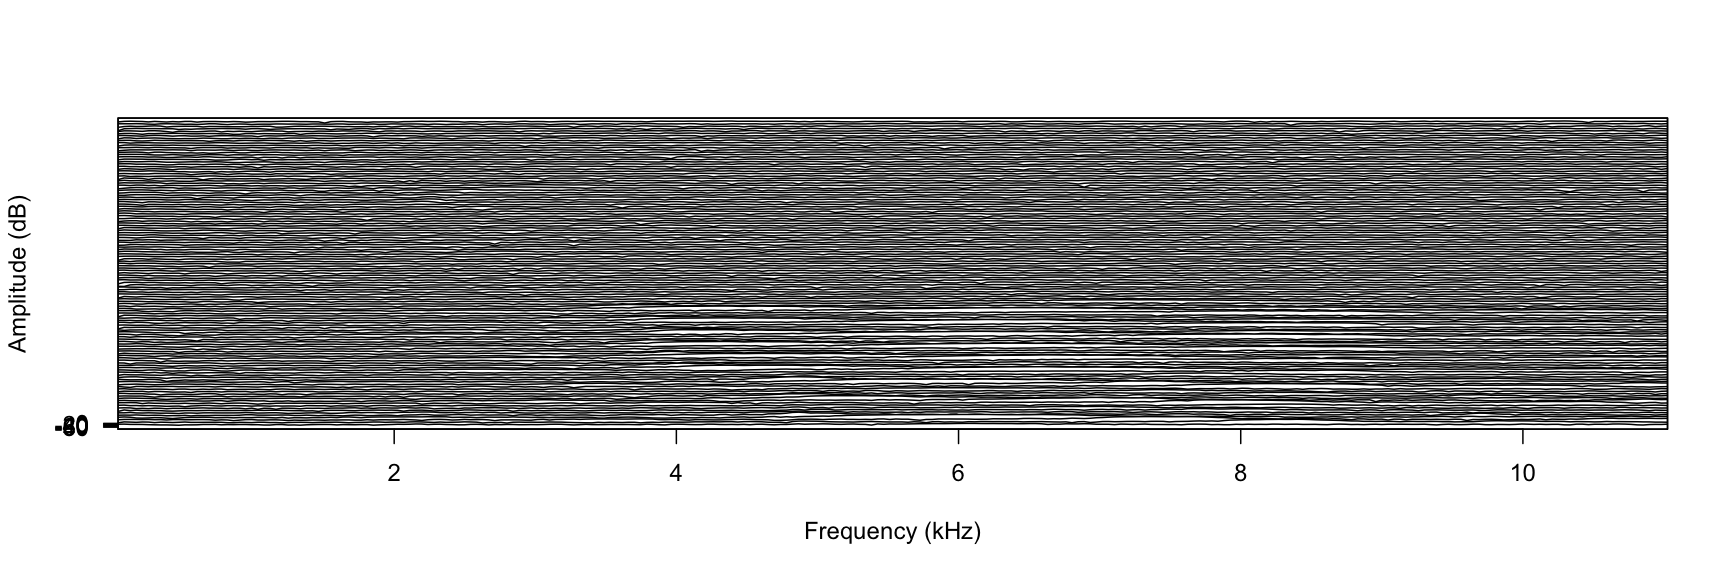

In [ ]:
audio %>%
    extractWave(from=2, to=5, xunit='time') %>%
    wf(
        ovlp=0,
        hoff=0,
        voff=50,
        col=colorRampPalette(c('white')),
    )